# test Images to SLM

There are two simple ways to generate images for SLM:

* images from diffractio.masksXY

* images from a file

There are some problems in sending the image to modulator and sometimes to acquire the image from camera in live mode

## Configuration

In [1]:
%run ../config_slm.ipynb

In [2]:
import py_slm.camera.tisgrabber as IC


In [3]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_XY import Scalar_mask_XY
from py_slm.config import CONF_HOLOEYE2500, CONF_PACKARD_BELL, CONF_IMAGING_SOURCE
from py_slm.py_slm import SLM

import time
from pprint import pprint
import cv2

ms=1.
seconds=1000*ms

In [4]:
CONF_HOLOEYE2500['num_pixels'][0]

1024

In [5]:
pprint(CONF_HOLOEYE2500)

{'astigmatism_removal': None,
 'callibration_table': None,
 'num_pixels': (1024, 768),
 'pos_screen': None,
 'size_pixels': (19.0, 19.0),
 'wavelength': 0.6327999999999999}


In [6]:
pprint(CONF_PACKARD_BELL)

{'astigmatism_removal': None,
 'callibration_table': None,
 'num_pixels': (1440, 900),
 'pos_screen': None,
 'size_pixels': (285.0, 295.0),
 'wavelength': 0.6327999999999999}


In [7]:
pprint(CONF_IMAGING_SOURCE)

{'format': 'Y800 (1024x768)',
 'framerate': 5,
 'id_camera': 'DMx 72BUC02 14210296'}


### Information about screens

In [8]:
import screeninfo
screeninfo.get_monitors()

[monitor(1440x900+0+0), monitor(1024x768+1440+0)]

## Image from diffractio.maksXY


In [9]:
slm=SLM(config_SLM=CONF_HOLOEYE2500, config_Camera=CONF_IMAGING_SOURCE)

x0=slm.x0
y0=slm.y0
wavelength=slm.wavelength
print(x0.shape, y0.shape)

((1024L,), (768L,))


In [10]:
slm.get_background()

max=137. min=13
shape = (768L, 1024L, 3L)


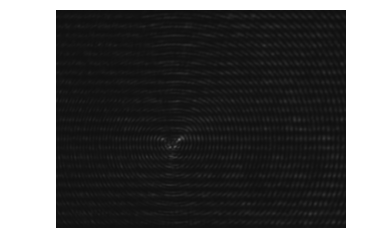

In [11]:
slm.show_background()

In [59]:
radius=(1000*um, 1000*um)

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.grating_2D_ajedrez(period=1 * mm, amin=0, amax=1., phase=0. * np.pi / 2,
                x0=0, fill_factor=0.5, angle=0.0 * degrees)
t1.circle(r0=(0 * um, 0 * um), radius=radius)
#t1.archimedes_spiral(r0=(0 * um, 0 * um), period=100*um , phase=0 * degrees, potencia=.5, radius=8 * mm, binaria=True)
#t1.axicon(r0=(0,0), radius=10*mm, height=2*um, n=1.5)
t1.lens(r0=(0 * um, 0 * um), radius=(4*mm,4*mm), focal=(500*mm,500*mm), angle=0.0, mask=True)


horizontal


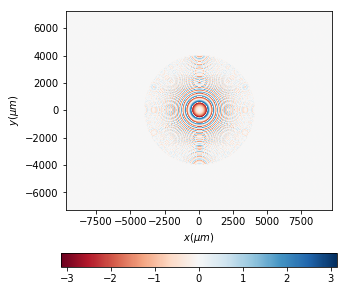

In [60]:
t1.draw(kind='phase', has_colorbar='horizontal');


In [61]:
slm.mask_to_rawImage(mask_XY=t1, kind='phase', normalize=True)

array([[127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127]], dtype=uint8)

In [62]:
t1.u.max()

(0.9999999895099598+0.00014484502179574395j)

In [63]:
slm.image_raw.min(), slm.image_raw.max()

(0, 254)

In [53]:
tipo='phase'

if tipo == 'phase':
    slm.image_raw=(255*(np.angle(t1.u)+np.pi)/(2*np.pi)).astype(
                    np.uint8)
elif tipo == 'intensity':
    slm.image_raw=(255*t1.u).astype( np.uint8)

In [64]:
slm.send_image_screen()

In [71]:
cv2.destroyAllWindows()

In [65]:
slm.camera1.StartLive(0)
# slm.camera1.StartLive(1)
slm.camera1.SetPropertySwitch("Gain", "Auto", 1)


1

max=180. min=13
shape = (768L, 1024L, 3L)


<Figure size 432x288 with 0 Axes>

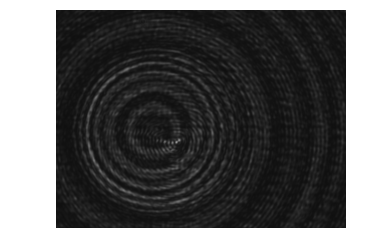

In [70]:

slm.camera1.SetPropertySwitch("Gain", "Auto", 0)
slm.camera1.SetPropertyValue("Gain", "Value", 4)

plt.figure()
image=slm.acquire_image(draw=True, remove_background=False, filename='');

max=157. min=14
shape = (768L, 1024L, 3L)


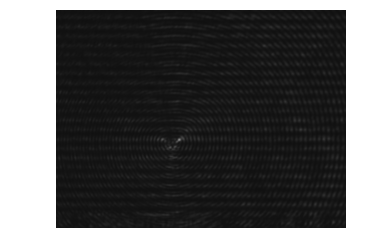

In [58]:
slm.show_background()

In [25]:
cv2.destroyAllWindows()

### Now, we send several images at a given interval

test0.png
max=0. min=0
shape = (768L, 1024L, 3L)
test1.png
max=0. min=0
shape = (768L, 1024L, 3L)
test2.png
max=0. min=0
shape = (768L, 1024L, 3L)
test3.png
max=0. min=0
shape = (768L, 1024L, 3L)
test4.png
max=0. min=0
shape = (768L, 1024L, 3L)
test5.png
max=0. min=0
shape = (768L, 1024L, 3L)
test6.png
max=0. min=0
shape = (768L, 1024L, 3L)
test7.png
max=0. min=0
shape = (768L, 1024L, 3L)
test8.png
max=0. min=0
shape = (768L, 1024L, 3L)
test9.png
max=0. min=0
shape = (768L, 1024L, 3L)


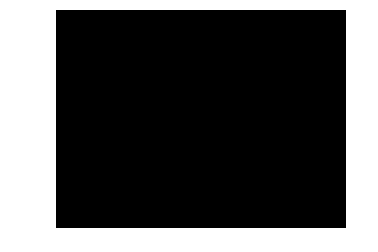

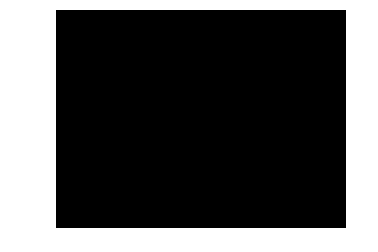

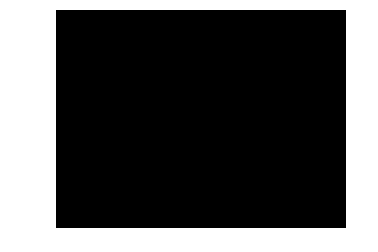

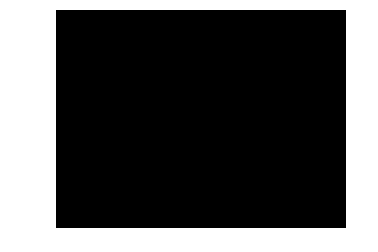

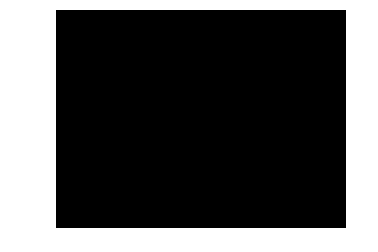

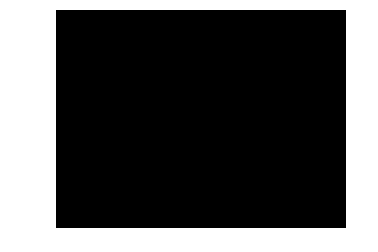

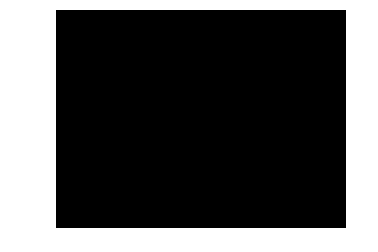

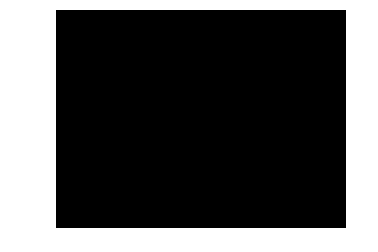

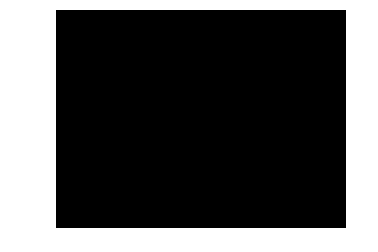

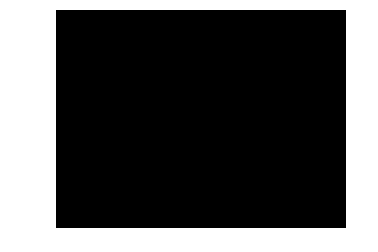

In [26]:
num_images=10

radii=np.linspace(100*um,2000*um,num_images)
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
name='test'

for i,r in enumerate(radii):
    t1.circle(r0=(0 * um, 0 * um), radius=(r,r))
    slm.mask_to_rawImage(mask_XY=t1, kind='intensity') 
    slm.send_image_screen(id_screen=0,  verbose=False)
    filename=name+str(i)+".png"
    print(filename)
    time.sleep(0.25)
    slm.acquire_image( draw=True, filename=filename);
    time.sleep(0.25)


In [27]:
cv2.destroyAllWindows()

In [28]:
time=500 #ms
incr_time=5 #ms
num_images=int(time/incr_time)

focales=np.linspace(100*mm, 500*mm, num_images)
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)

for i,focal in enumerate(focales):
    t1.fresnel_lens(r0=(0 * um, 0 * um), radius=(5*mm,5*mm),focal=(focal, focal))
    slm.mask_to_rawImage(mask_XY=t1, kind='intensity') 
    slm.send_image_screen(id_screen=0, incr_time=incr_time, verbose=False)
    

TypeError: send_image_screen() got an unexpected keyword argument 'incr_time'

In [ ]:
cv2.destroyAllWindows()

Not seen at tutorial, as send sequential images to screen.

## Image from file

In [ ]:
slm2=SLM(config_SLM=CONF_HOLOEYE2500, config_Camera=CONF_IMAGING_SOURCE)

x0=slm2.x0
y0=slm2.y0
wavelength=slm2.wavelength

t2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t2.image(filename='C:/Users/luismiguel/bitbucket/py_slm/docs/source/tests/hexagono3.png')
t2.draw(kind='intensity')

In [ ]:
slm2.mask_to_rawImage(mask_XY=t2, kind='intensity')
slm2.send_image_screen(id_screen=0, verbose=True)

In [113]:
cv2.destroyAllWindows()

In [108]:
screen = screeninfo.get_monitors()[1]

In [111]:
screen.x
screen.y

0

## Otra prueba

In [9]:
from diffractio.utils_optics import field_parameters

radius=(1000*um, 1000*um)

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.grating_2D_ajedrez(period=1 * mm, amin=0, amax=1., 
     phase=0. * np.pi / 2, x0=0, fill_factor=0.5, angle=0.0 * degrees)


amplitude, intensity, phase = field_parameters(t1.u)
image = intensity


In [ ]:
print(image.max(), image.min())

In [20]:
image = (255 * image / image.max()).astype(
                np.uint8)

In [21]:
print(image.max(), image.min())

(255, 0)


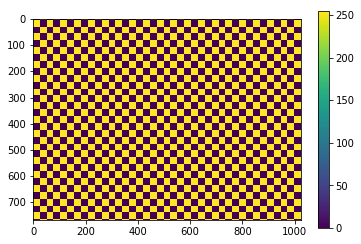

In [105]:
plt.imshow(image)
plt.colorbar()

In [22]:
window_name = 'SLM projector'

In [28]:
cv2.namedWindow(window_name, cv2.WND_PROP_FULLSCREEN)

In [29]:
cv2.moveWindow(window_name, 1, 1)

In [32]:
cv2.setWindowProperty(window_name, cv2.WND_PROP_FULLSCREEN,
                      cv2.WINDOW_FULLSCREEN)

In [35]:
cv2.imshow(window_name, image)

In [72]:
cv2.destroyAllWindows()

In [1]:
import subprocess

In [10]:
image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [12]:
np.std(image)

0.4999999068677339

In [13]:
t2=t1.RS(z=1*mm,new_field=True)

- Needs denser sampling: factor 0.023602950503893553


In [74]:
slm.close()

AttributeError: 'SLM' object has no attribute 'close'